In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Fourier transform/cospi.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    247 non-null    object
 1   Open    247 non-null    int64 
 2   High    247 non-null    int64 
 3   Low     247 non-null    int64 
 4   Close   247 non-null    int64 
 5   Volume  247 non-null    int64 
 6   cos     247 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.6+ KB


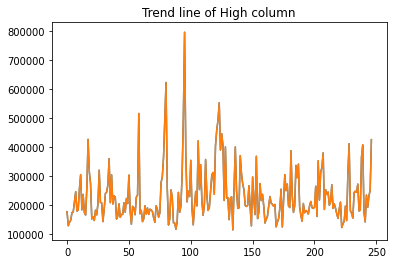

[57470612.          3322094.26309068  3383258.49941747  2147227.42508749
  1091325.72482869  1437356.14082268  1260724.56513144   987458.76526258
  2183756.45867231  3189981.59414533  1366440.01459569  3412146.9495404
  3816372.99009623   850800.62149124   101836.07420489  2146251.7448492
  3706913.96765343  3481495.61686533  2548936.90766934  1609847.31520327
  1553023.34767751  1112557.35113804   930467.80346515  1117690.84398867
   605948.93704425  2620936.95704155  1552669.83443311   680883.63247654
  2521422.60833959  1313764.19556182   694712.88345572   979228.93655012
  1869666.50211879  1564835.61850603  1553564.56778979  1727701.51900114
  1351422.52356437  1830625.830382    1481146.69596486  1286722.30078637
   792936.80005401  1343278.00692789  1252399.51668888  2273112.68656855
  1496971.4007722   1496531.99921437  1585322.42851031  1988577.18991965
  2766519.79117621  1053823.45388663   126552.52355939  1495707.42939504
   628409.82183012  1386100.73127449  2356900.8962650

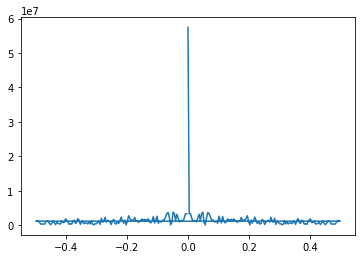

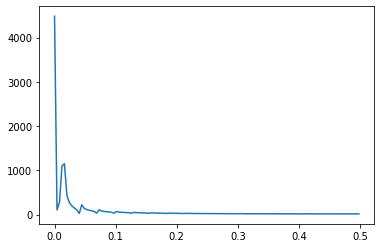

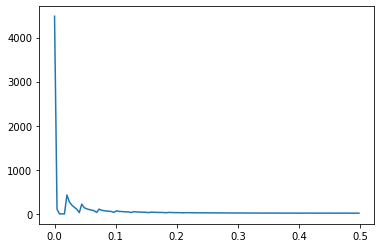

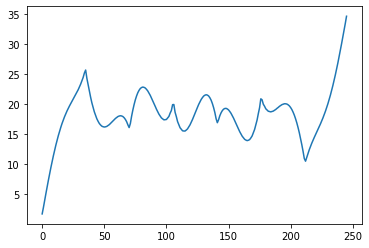

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import write
import os

#### 시계열 데이터를 읽기
import pandas as pd
cospi = pd.read_csv(data_path)
cospi.info()

# 미국식 날짜 -> 한국식 날짜
from datetime import datetime

sdate = '26-Feb-16'
datetime.strptime(sdate, '%d-%b-%y')   # (2016, 2, 26, 0, 0)

date = cospi['Date']
len(date) # 247

# list 내포
kdate = [datetime.strptime(d, '%d-%b-%y') for d in date]

# 날짜 형식 변경
cospi['Date'] = kdate

cospi['Volume'].plot(title = 'Trend line of High column')
plt.plot(cospi['Volume'])
plt.show()


########
# 푸리에 계산하기
########
yf = fft(cospi['Volume'])   # fft() calculates the transform itself.
xf = fftfreq(247, 1)    # fftfreq() calculates the frequencies in the center of each bin in the output of fft().
# n: int Window length. d: scalar, optional, Sample spacing (inverse of the sampling rate). Defaults to 1.
# 247은 예제 파일 cospi.csv의 sample 수 임

print(np.abs(yf))
np.savetxt('ttf.txt',np.abs(yf))


plt.plot(xf, np.abs(yf))
plt.show()

# rttf로 더 빠르게 계산하기
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(cospi['cos'])
xf = rfftfreq(247, 1)

plt.plot(xf, np.abs(yf))
# rfft() still produces complex output, so the code to plot its result remains the same. The plot, however, should look like the following since the negative frequencies will have disappeared:
plt.show()

#####
# 시그널 필터링하기
#####
# The maximum frequency is half the sample rate
#points_per_freq = len(xf) / (SAMPLE_RATE / 2)
points_per_freq = len(xf) / 40  # 40은 그냥 넣어보았음

# Our target frequency is 4000 Hz
#target_idx = int(points_per_freq * 4000)
target_idx = int(points_per_freq)

yf[target_idx - 1 : target_idx + 2] = 0

# 특정 푸리에값이 필터링 된 상태의 그래프 보기
plt.plot(xf, np.abs(yf))
plt.show()

# 역푸리에 (위의 필터링 된 정보로 다시 파장 정보, 즉 time series로 바꾸기)
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

#norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))
norm_new_sig = np.int16(new_sig * (32767 / new_sig.max()))

#write("clean.wav", SAMPLE_RATE, norm_new_sig)
write("clean.wav", 100, norm_new_sig)